In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import scipy.stats

# Ques 1

In [2]:
def linear_regression(X,Y, sig):
    
    chi2 = 0
    S = 0
    Sx = 0
    Sy = 0
    Sxx = 0
    Sxy = 0
    Syy = 0
    Y1 = [0 for i in range(len(X))]
    
    for i in range(len(X)):
        
        S = S + 1/(sig[i]**2)
        Sx = Sx + X[i]/(sig[i]**2)
        Sy = Sy + Y[i]/(sig[i]**2)
        Sxx = Sxx + (X[i]**2)/(sig[i]**2)
        Sxy = Sxy + (X[i]*Y[i])/(sig[i]**2)
        
    delta = S*Sxx - (Sx**2)
    a = (Sxx*Sy - Sx*Sxy)/delta
    b = (S*Sxy - Sx*Sy)/delta
        
    covab = -Sx/delta
    sig2_a = Sxx/delta
    err_a = math.sqrt(sig2_a)
    sig2_b = S/delta
    err_b = math.sqrt(sig2_b)
    for i in range(len(X)):
        Y1[i] = a + b * X[i]
        chi2 = chi2 + ((Y[i] - Y1[i])/sig[i])**2
        
    return a,b, covab, err_a, err_b

def readfile(filename,start):
    with open(filename,"r+") as f:
        lines = f.readlines()
        A=[]
        for i in range(start,len(lines)):
            A.append([float(j) for j in lines[i].split()])
        del lines
        return A

In [3]:

# Read data from file
data = pd.read_csv('esemfit.txt', sep='\s+', header=None)
time = data.iloc[:, 0]
counts = data.iloc[:, 1]
sigma = data.iloc[:, 2]

# Calculating log
ln_counts = np.log(counts)
sigma_ln_counts = 1 / np.sqrt(counts)

In [4]:

a,t, covab, err_a, err_b=linear_regression(time, ln_counts , sigma_ln_counts)
lifetime = -1/t
print('the lifetime of the radioactive material was',lifetime)

error = lifetime * np.sqrt(np.sum(sigma_ln_counts ** 2) / (len(time) - 2))
print('The error in the lifetime was',error)

the lifetime of the radioactive material was 110.0380598212136
The error in the lifetime was 17.042096605166556


The fit is acceptable at the 5% level of significance.


NameError: name 'A' is not defined

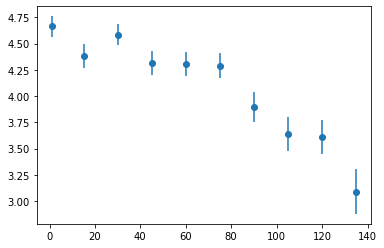

In [7]:
# Check if the fit is acceptable at the 5% level of significance
alpha = 0.05
df = len(time) - 2 
critical = scipy.stats.chi2.ppf(1 - alpha, df)

# Calculate reduced χ²
reduced_chi_square = (np.sum(((ln_counts - a - t * time) / sigma_ln_counts) ** 2) / (len(time) - 2))

if reduced_chi_square < critical:
    print(f'The fit is acceptable at the 5% level of significance.')
else:
    print(f'The fit is NOT acceptable at the 5% level of significance.')
    
# Plot data and fit
plt.errorbar(time, ln_counts, yerr=sigma_ln_counts, fmt='o', label='Data')
plt.plot(time, A= + tau * time, label=f'Fit: tau = {tau:.4f} ± {error:.4f}')
plt.xlabel('Time (s)')
plt.ylabel('ln(Counts)')
plt.title('Decaying Radioactive Source Fit')
plt.legend()
plt.show()

# Print results
print(f'Lifetime: {lifetime:.4f} ± {error:.4f} s')